## **Загрузка данных**

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!scp 'gdrive/MyDrive/Projects/Hac_VNIIGAZ/data/second_part_data.zip' '/content/second_part_data.zip'
!unzip '/content/second_part_data.zip' -d '/content/'

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/second_part_data/labels/train/id_1239_value_322_859_jpg.rf.df13f74f54767fb587ff71aa7bdc120c.txt  
  inflating: /content/second_part_data/labels/train/id_123_value_337_294_jpg.rf.b8a919aff9f870aef3e83f5f6accf243.txt  
  inflating: /content/second_part_data/labels/train/id_123_value_337_294_jpg.rf.d225c58d7c77db9fd51f5598d2fc3a4d.txt  
  inflating: /content/second_part_data/labels/train/id_1240_value_28_306_jpg.rf.09227591fd3b228304dc29ea68a277aa.txt  
  inflating: /content/second_part_data/labels/train/id_1240_value_28_306_jpg.rf.108cc3bbf24117c891c80a214a04f5f5.txt  
  inflating: /content/second_part_data/labels/train/id_1240_value_28_306_jpg.rf.306f8df7420ef59ad5fda5ffeab2c6dc.txt  
  inflating: /content/second_part_data/labels/train/id_1240_value_28_306_jpg.rf.5acb566fa981a19df55e5c8f060c966f.txt  
  inflating: /content/second_part_data/labels/train/id_1240_value_28_306_jpg.rf.654d5dfa9e10fae4c9

## **Обучение модели**

In [3]:
!git clone https://github.com/THU-MIG/yolov10.git
!cd yolov10 && pip install .

Cloning into 'yolov10'...
remote: Enumerating objects: 20332, done.
remote: Counting objects: 100% (2446/2446), done.
remote: Compressing objects: 100% (250/250), done.
remote: Total 20332 (delta 2317), reused 2197 (delta 2196), pack-reused 17886 (from 1)
Receiving objects: 100% (20332/20332), 11.14 MiB | 20.67 MiB/s, done.
Resolving deltas: 100% (14337/14337), done.
Processing /content/yolov10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=731421 sha256=c38677a9833d0bc1335f3966893a798357ee04b4fb012f9084f0a7a49e434002
  Stored in directory: /tmp/pip-ephem-wheel-cache-s5zrccff/wheels/51/93/e8/22d2e815ced343915c15d86b2a00d95eb0a997d012527fbea7
Successfully built ultralytics


In [4]:
!pip install albumentations==1.4
import os
from ultralytics import YOLOv10
import torch
import numpy as np
import shutil

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [6]:
from google.colab import files

In [5]:
config_path = '/content/gdrive/MyDrive/Projects/Hac_VNIIGAZ/code/config_second_part.yaml'

In [ ]:
model = YOLOv10.from_pretrained("jameslahm/yolov10n")

In [ ]:
results = model.train(data=config_path, epochs=20, batch=8)

New https://pypi.org/project/ultralytics/8.3.13 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov10n.yaml, data=/content/gdrive/MyDrive/Projects/Hac_VNIIGAZ/code/config_second_part.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, clas

train: Scanning /content/second_part_data/labels/train... 5903 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5903/5903 [00:03<00:00, 1525.95it/s]


train: New cache created: /content/second_part_data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/second_part_data/labels/val... 656 images, 0 backgrounds, 0 corrupt: 100%|██████████| 656/656 [00:00<00:00, 1527.63it/s]

val: New cache created: /content/second_part_data/labels/val.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/20         0G      3.677      4.733      3.394      3.392      6.983      3.319         67        640: 100%|██████████| 738/738 [1:43:51<00:00,  8.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [05:11<00:00,  7.61s/it]


                   all        656       4085    0.00784      0.223     0.0107    0.00395

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/20         0G      2.671      3.792      2.487      2.289      5.142       2.17         71        640:   9%|▉         | 70/738 [09:50<1:39:04,  8.90s/it]

In [ ]:
torch.save(model.state_dict(), 'gdrive/MyDrive/Projects/Hac_VNIIGAZ/code/second.pt')

In [ ]:
shutil.make_archive('/content/train2', 'zip', '/content/runs/detect/train2')
files.download('/content/train2.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Предсказания**

In [7]:
!pip install supervision
import cv2
import supervision as sv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 3.2 MB/s eta 0:00:00


In [10]:
trained_model = YOLOv10('gdrive/MyDrive/Projects/Hac_VNIIGAZ/models/best_second.pt')

In [17]:
result = trained_model('gdrive/MyDrive/Projects/Hac_VNIIGAZ/data/test/id_43_value_123_689_jpg.rf.696ffeb98c488390dd8667bfbe1ac279.jpg', task='detect', conf=0.25)


image 1/1 /content/gdrive/MyDrive/Projects/Hac_VNIIGAZ/data/test/id_43_value_123_689_jpg.rf.696ffeb98c488390dd8667bfbe1ac279.jpg: 640x640 1 0, 1 1, 1 2, 1 3, 1 6, 1 8, 952.2ms
Speed: 4.3ms preprocess, 952.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


In [18]:
print(result[0].boxes.xyxy)
print(result[0].boxes.conf)
print(result[0].boxes.cls)

tensor([[438.3084, 274.5193, 504.1600, 367.2426],
        [544.4675, 285.3128, 611.8181, 378.8237],
        [117.3270, 265.2849, 172.8390, 364.9021],
        [334.2687, 271.7168, 401.6435, 365.8434],
        [220.7990, 269.5807, 295.2403, 366.9721],
        [  7.3768, 264.6101,  75.3854, 359.4252]])
tensor([0.9097, 0.8242, 0.8174, 0.7458, 0.7102, 0.4143])
tensor([6., 8., 1., 3., 2., 0.])


## **Тестируем**

In [49]:
def show_results(path, model, size=(10,6)):
    image = cv2.imread(path)
    result = model(image)[0]
    detections = sv.Detections.from_ultralytics(result)
    bounding_box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    annotated_image = bounding_box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)
    sv.plot_image(annotated_image, size=size)
    print(result.boxes.cls)

### **Без обрезки**


0: 480x640 1 0, 2 1s, 447.3ms
Speed: 9.0ms preprocess, 447.3ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


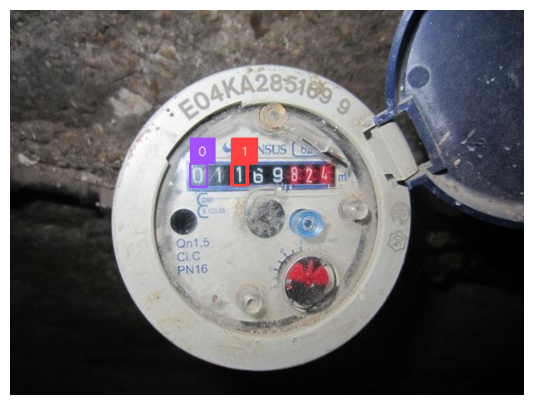

tensor([1., 0., 1.])


In [53]:
show_results('gdrive/MyDrive/Projects/Hac_VNIIGAZ/data/test/test.jpg',
             trained_model, size=(8, 5))

### **Полная обрезка**


0: 192x640 1 1, 1 4, 1 6, 1 8, 1 9, 519.2ms
Speed: 1.6ms preprocess, 519.2ms inference, 1.5ms postprocess per image at shape (1, 3, 192, 640)


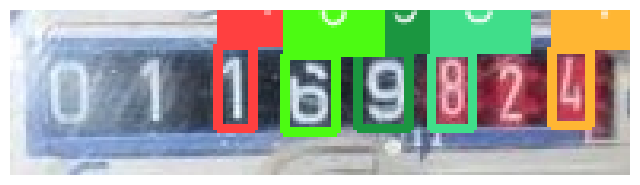

tensor([9., 4., 8., 1., 6.])


In [54]:
show_results('gdrive/MyDrive/Projects/Hac_VNIIGAZ/data/test/fully_cropped_test.jpg',
             trained_model, size=(8, 5))

### Частичная обрезка


0: 256x640 1 0, 2 1s, 1 2, 1 4, 2 6s, 1 8, 1 9, 212.9ms
Speed: 5.3ms preprocess, 212.9ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)


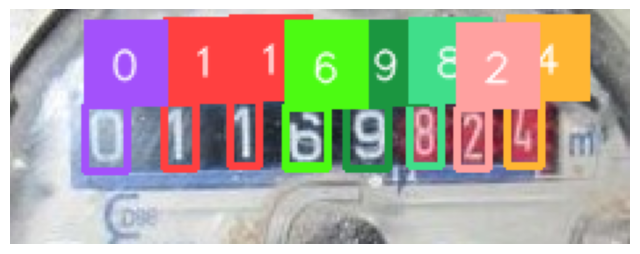

tensor([9., 1., 0., 4., 1., 8., 2., 6., 6.])


In [57]:
show_results('gdrive/MyDrive/Projects/Hac_VNIIGAZ/data/test/partly_cropped_test.jpg',
             trained_model, size=(8, 5))